# Specificity & STY ratio

## Setup

In [ ]:
#!pip install git+https://github.com/sky1ove/katlas.git -q

In [ ]:
from katlas.core import *
from katlas.plot import *
from fastbook import *
import seaborn as sns
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

## Assign color to kinase

In [ ]:
info = Data.get_kinase_info().query('pseudo=="0"')

In [ ]:
info.group.unique()

array(['Other', 'TK', 'TKL', 'Atypical', 'AGC', 'CAMK', 'CMGC', 'CK1', 'STE'], dtype=object)

In [ ]:
group = ['TK','AGC','CMGC','Other','TKL','STE','CK1','CAMK','Atypical','RGC']

In [ ]:
kinase_color = get_color_dict(group)

To save and load

In [ ]:
# save_pickle('raw/kinase_color.pkl',kinase_color)

kinase_color = load_pickle('raw/kinase_color.pkl')

## Specificty from PSPA data

In [ ]:
pspa = pd.read_csv('raw/specificity_max.csv')

In [ ]:
sort_pspa = pspa.sort_values('max',ascending=False).reset_index(drop=True)

In [ ]:
# sort_pspa.to_csv('raw/specificity_pspa.csv',index=False)

In [ ]:
info = Data.get_kinase_info().query('pseudo=="0"')

In [ ]:
sort_pspa =sort_pspa.merge(info)

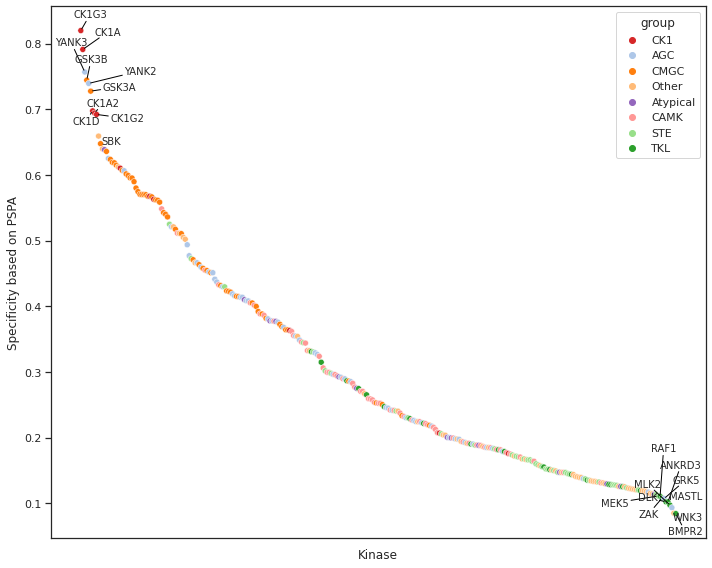

In [ ]:
plot_rank(sort_pspa,x='kinase',y='max',hue='group',palette=kinase_color)
plt.ylabel('Specificity based on PSPA')
plt.xlabel('Kinase');

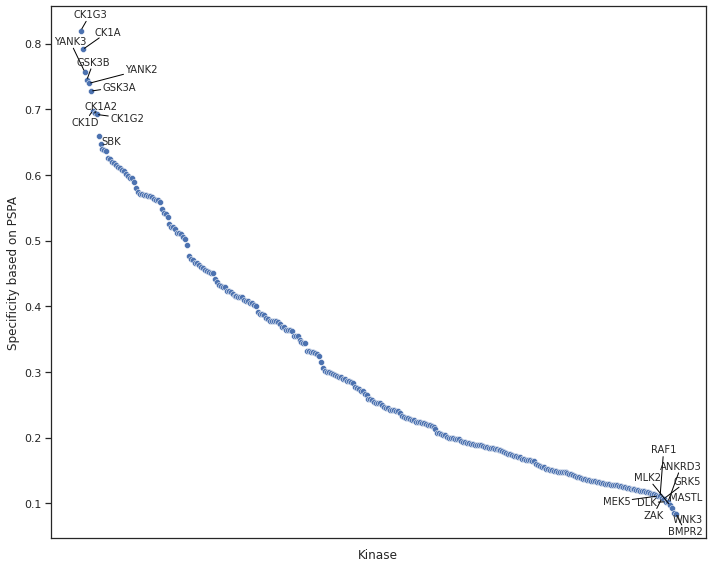

In [ ]:
plot_rank(sort_pspa,x='kinase',y='max')
plt.ylabel('Specificity based on PSPA')
plt.xlabel('Kinase');

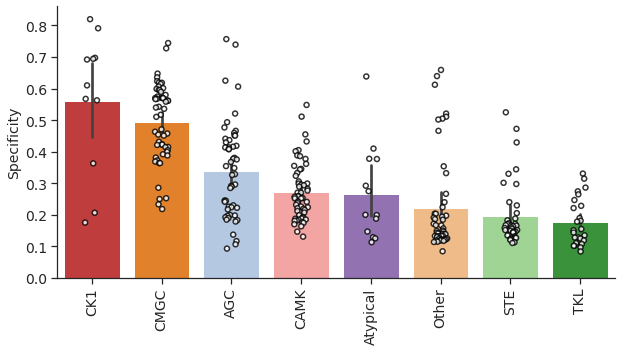

In [ ]:
plot_bar(sort_pspa,'max','group',palette=kinase_color,figsize=(10,5))
plt.ylabel('Specificity');

## Specificty from kinase-substrate dataset

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

In [ ]:
ks = pd.read_excel('raw/freq_main.xlsx',index_col = 0)

ks = ks.iloc[:,:-3].max(1).reset_index(name='max')

ks = ks.rename(columns={'index':'kinase'})

sort_ks = ks.sort_values('max',ascending=False).reset_index(drop=True)

# sort_ks.to_csv('raw/specificity_ks.csv',index=False)

sort_ks =sort_ks.merge(info)

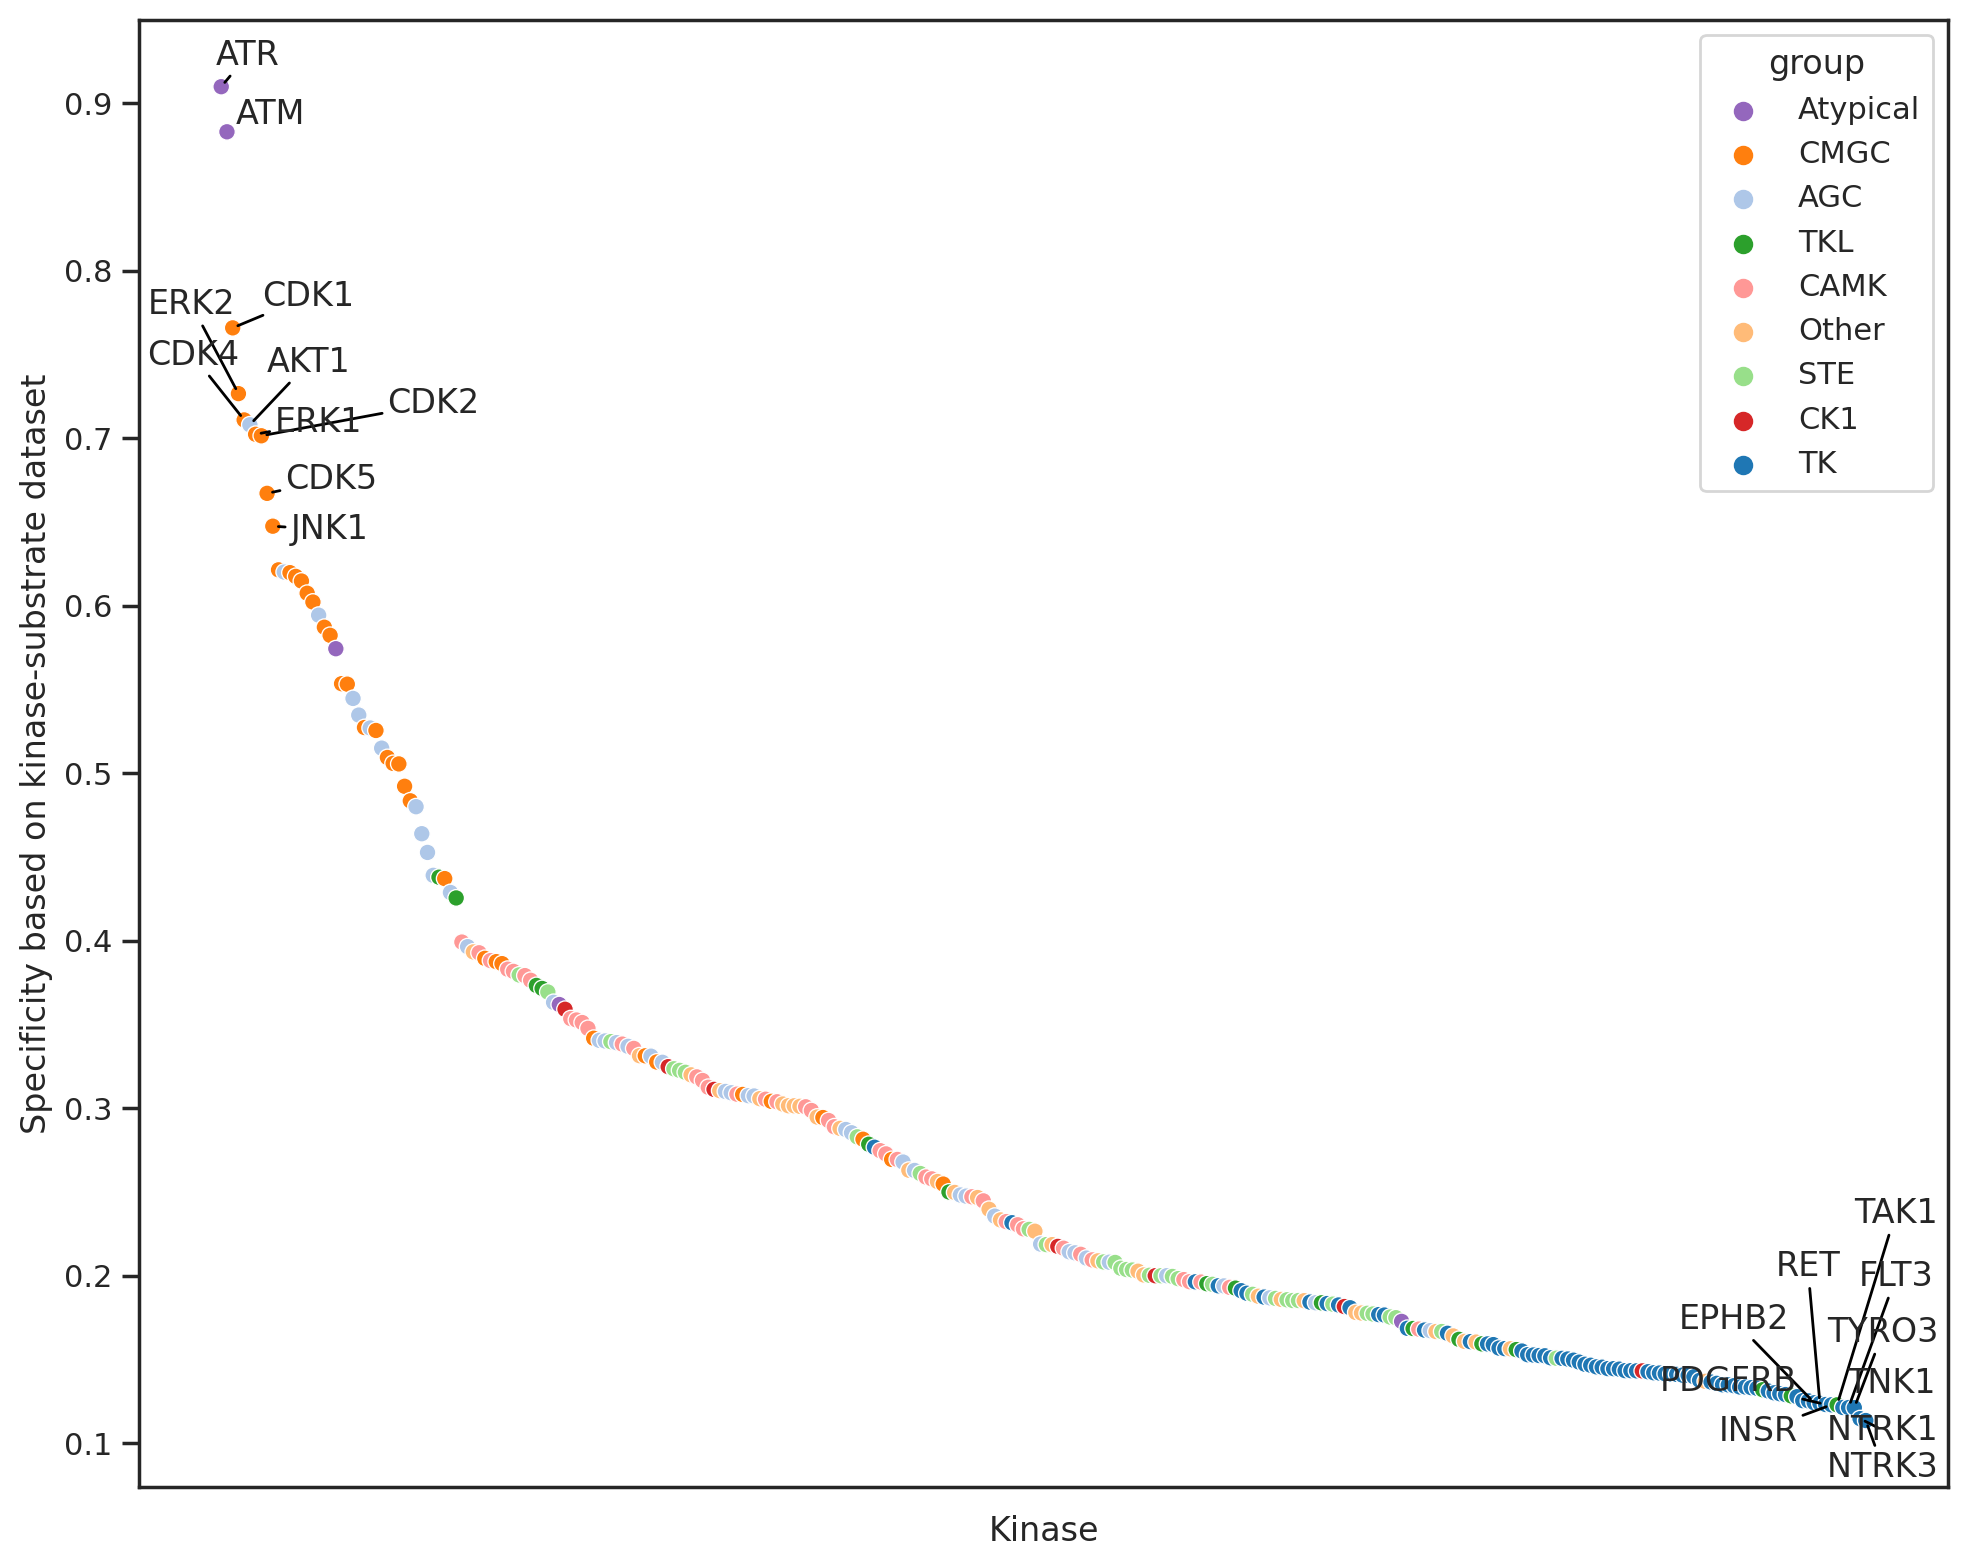

In [ ]:
plot_rank(sort_ks,x='kinase',y='max',hue='group',palette=kinase_color)
plt.ylabel('Specificity based on kinase-substrate dataset')
plt.xlabel('Kinase');

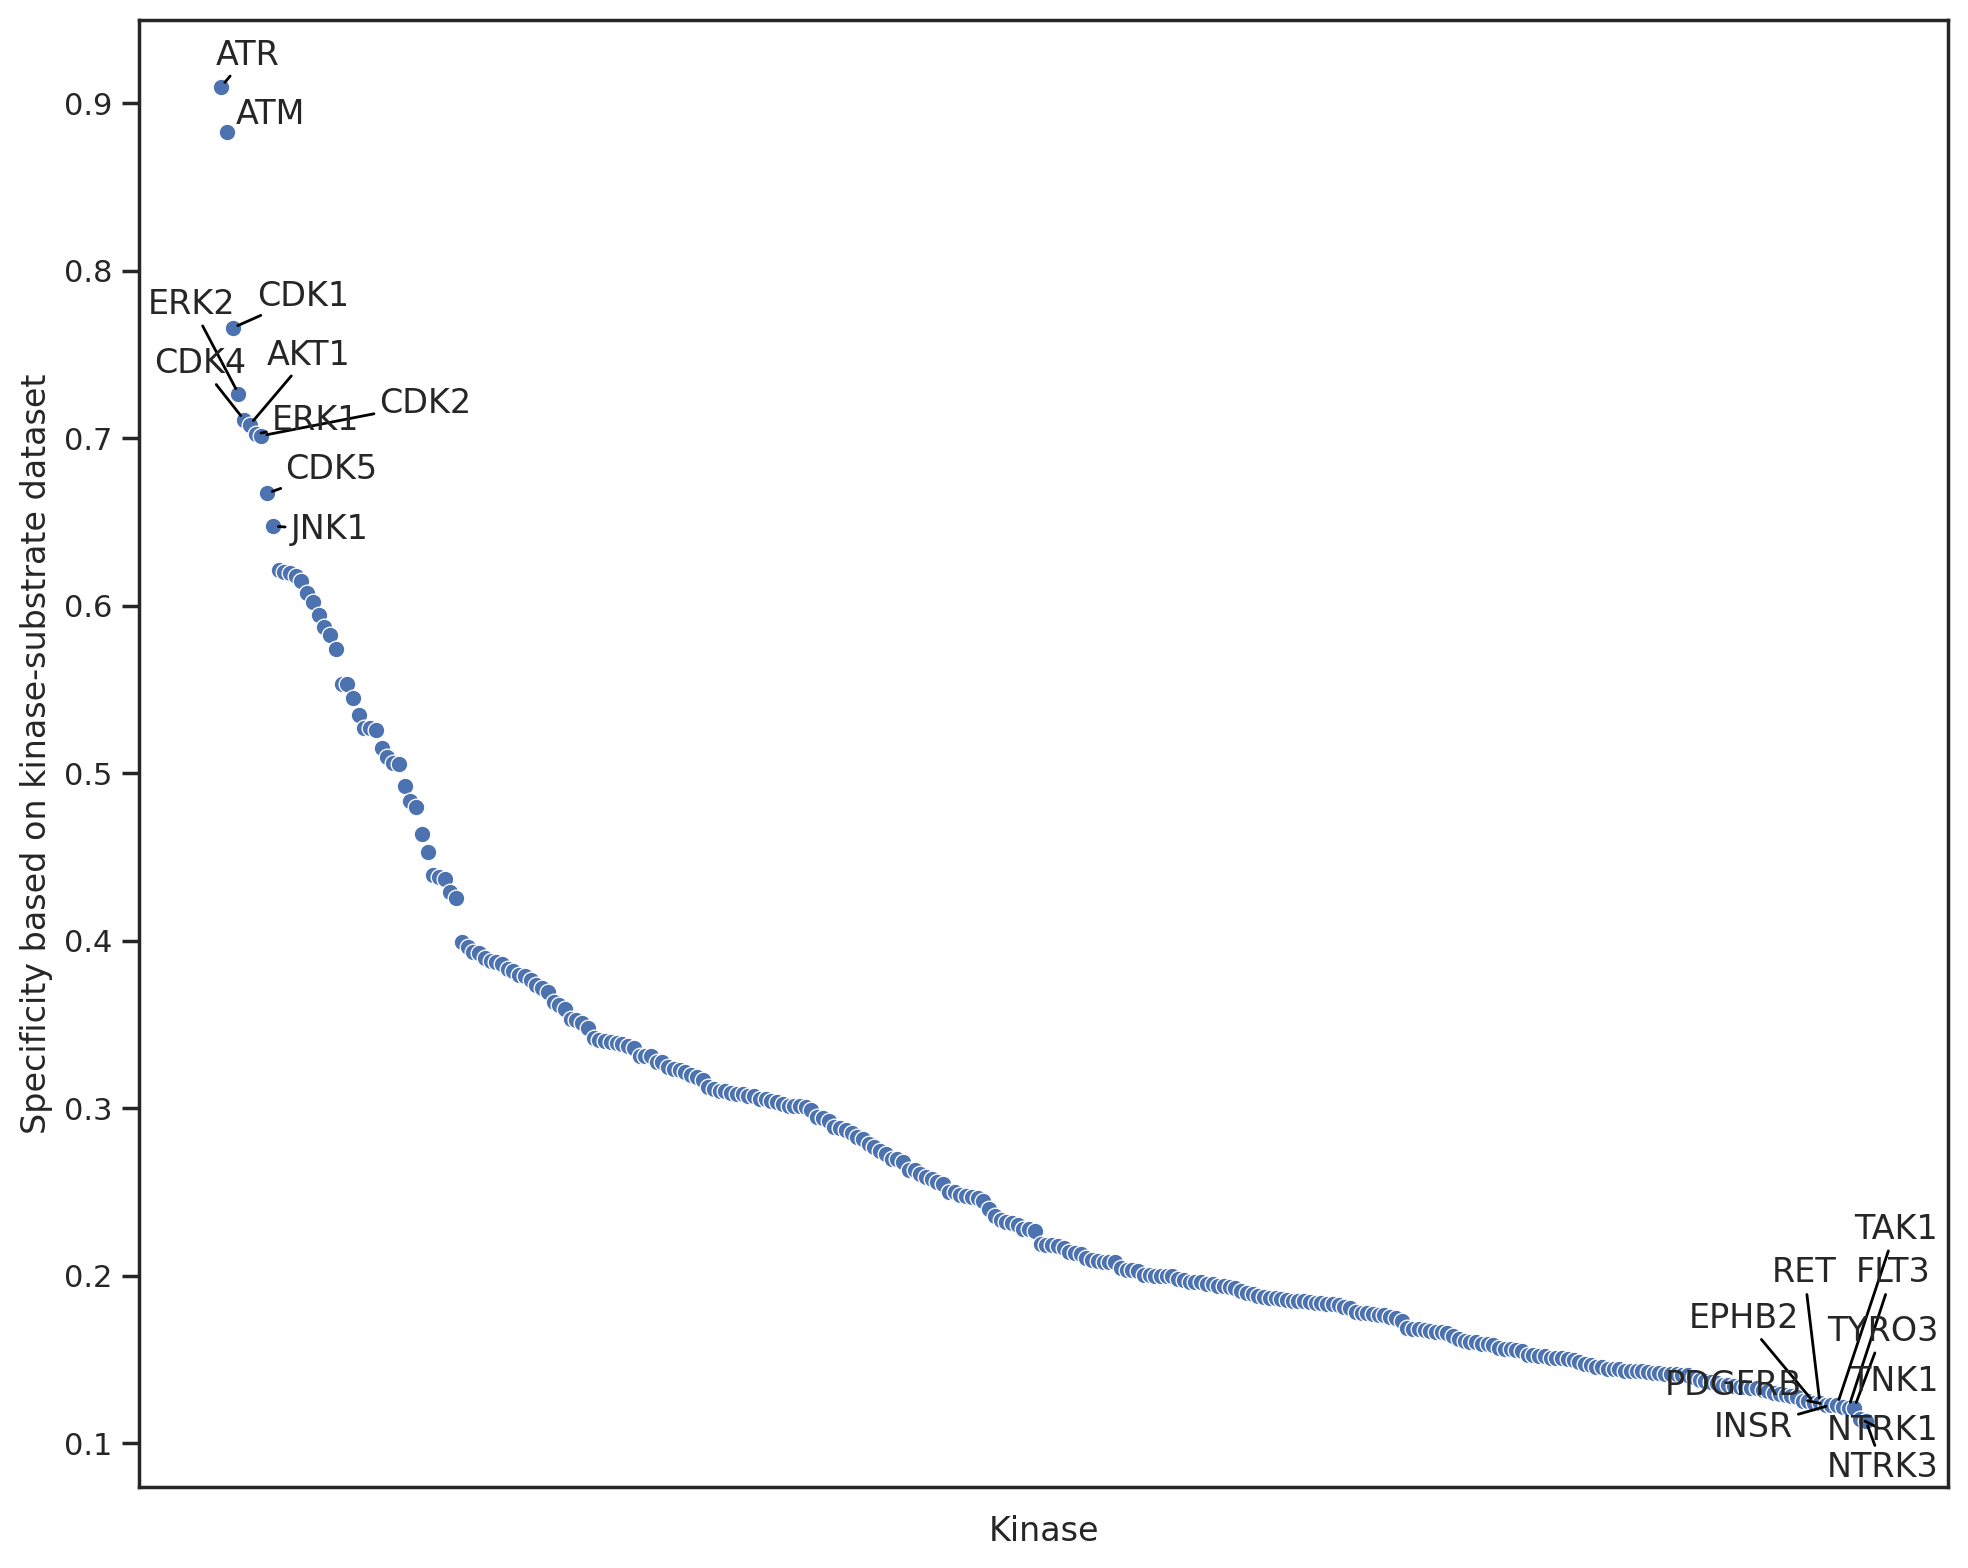

In [ ]:
plot_rank(sort_ks,x='kinase',y='max')
plt.ylabel('Specificity based on kinase-substrate dataset')
plt.xlabel('Kinase');

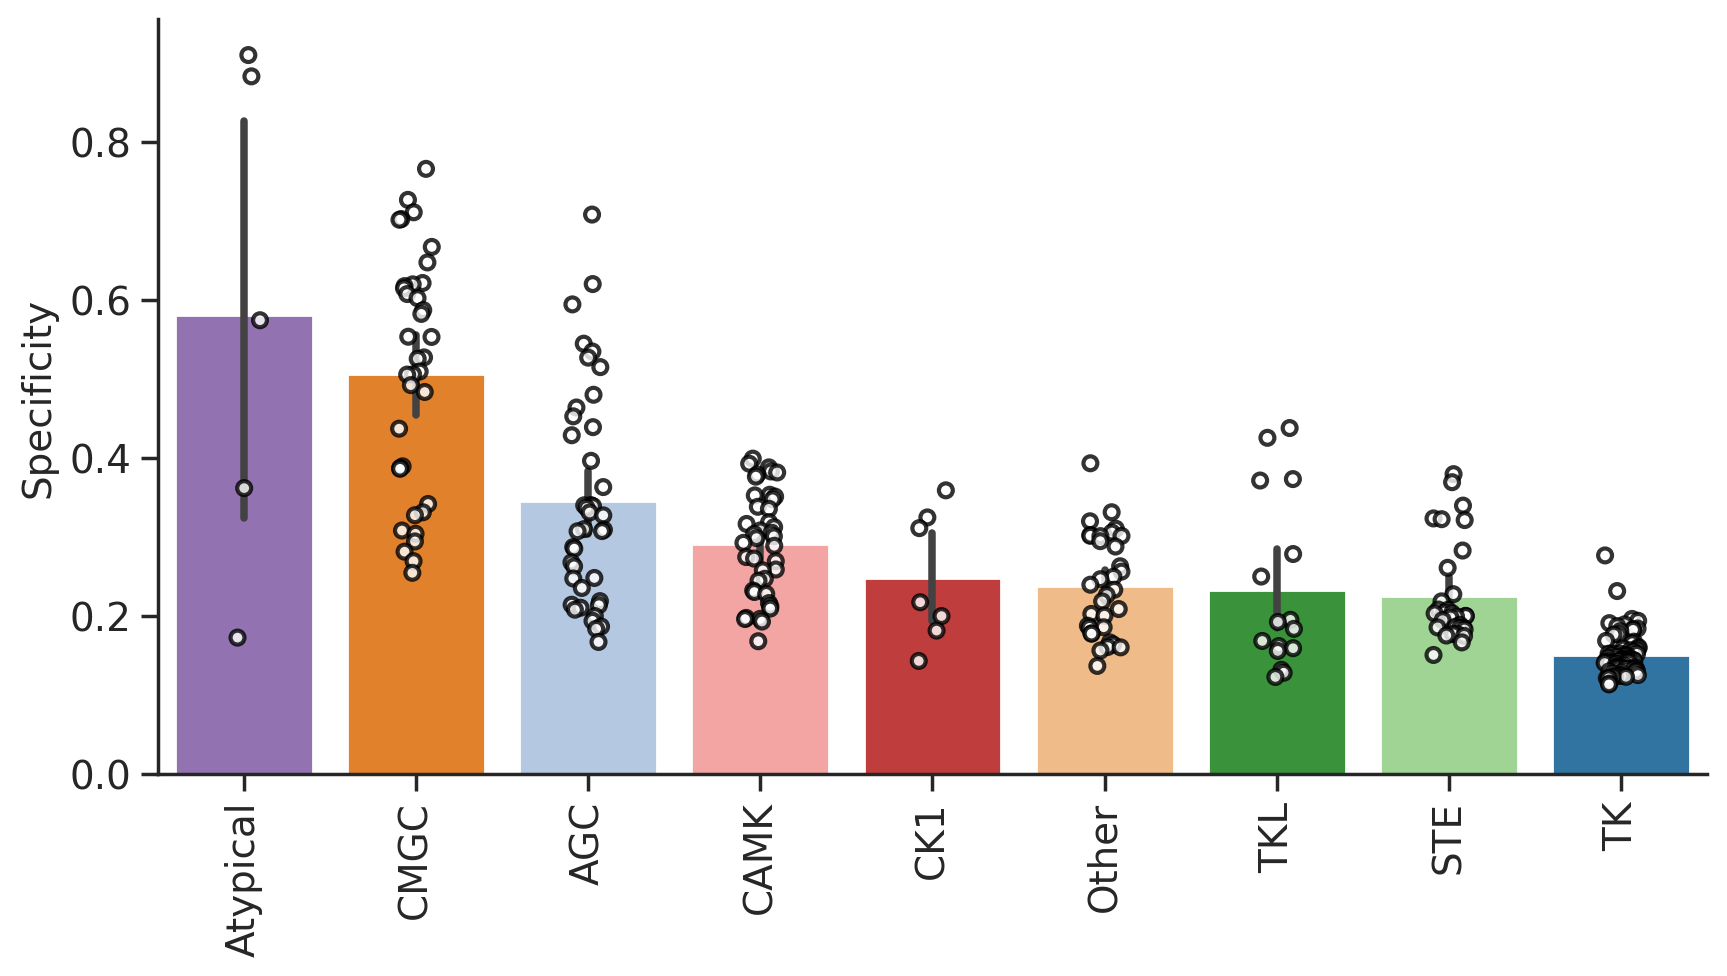

In [ ]:
plot_bar(sort_ks,'max','group',palette=kinase_color,figsize=(10,5))
plt.ylabel('Specificity');

## Specificity correlation between the two

In [ ]:
overlap = sort_ks[sort_ks.kinase.isin(sort_pspa.kinase)]

overlap = overlap.rename(columns = {'max':'ks_max'})

overlap = overlap.merge(sort_pspa.iloc[:,:2],'left')

overlap = overlap.rename(columns = {'max':'PSPA_max'})

In [ ]:
overlap

,kinase,ks_max,ID_coral,uniprot,ID_HGNC,group,family,subfamily_coral,subfamily,in_ST_paper,in_Tyr_paper,in_cddm,pseudo,pspa_category_small,pspa_category_big,cddm_big,cddm_small,length,human_uniprot_sequence,kinasecom_domain,nucleus,cytosol,cytoskeleton,plasma membrane,mitochondrion,Golgi apparatus,endoplasmic reticulum,vesicle,centrosome,aggresome,main_location,PSPA_max
0,ATR,0.90984,ATR,Q13535,ATR,Atypical,PIKK,ATR,ATR,1,0,1,0,PIKK,PIKK,5.0,44.0,2644,MGEHGLELASMIPALRELGSATPEEYNTVVQKPRQILCQFIDRILTDVNVVAVELVKKTDSQPTSVMLLDFIQHIMKSSPLMFVNVSGSHEAKGSCIEFSNWIITRLLRIAATPSCHLLHKKICEVICSLLFLFKSKSPAIFGVLTKELLQLFEDLVYLHRRNVMGHAVEWPVVMSRFLSQLDEHMGYLQSAPLQLMSMQNLEFIEVTLLMVLTRIIAIVFFRRQELLLWQIGCVLLEYGSPKIKSLAISFLTELFQLGGLPAQPASTFFSSFLELLKHLVEMDTDQLKLYEEPLSKLIKTLFPFEAEAYRNIEPVYLNMLLEKLCVMFEDGVLMRLKSDLLKAALCHLLQYFLKFVPAGYESALQVRKVYVRNICKALLDVLGIEVDAEYLLGPLYAALKMESMEIIEEIQCQTQQENLSSNSDGISPKRRRLSSSLNPSKRAPKQTEEIKHVDMNQKSILWSALKQKAESLQISLEYSGLKNPVIEMLEGIAVVLQLTALCTVHCSHQNMNCRTFKDCQHKSKKKPSVVITWMSLDFYTKVLKSCRSLLESVQKLDLEATIDKVVKIYDALIYMQVNSSFEDHILEDLCGMLSL...,AYIAGFDDMVEILASLQKPKKISLKGSDGKFYIMMCKPKDDLRKDCRLMEFNSLINKCLRKDAESRRRELHIRTYAVIPLNDECGIIEWVNNTAGLRPILTKLYKEKGVYMTGKELRQCMLPKSAALSEKLKVFREFLLPRHPPIFHEWFLRTFPDPTSWYSSRSAYCRSTAVMSMVGYILGLGDRHGENILFDSLTGECVHVDFNCLFNKGETFEVPEIVPFRLTHNMVNGMGPMGTEGLFRRACEVTMRLMRDQREPLMSVLKTFLHDPLVEWSKPVKGHSKAPLNETGEVVNEKAKTHVLDIEQRLQGVIKTRNRVTGLPLSIEGHVHYLIQEA,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nucleus,0.275012
1,ATM,0.88291,ATM,Q13315,ATM,Atypical,PIKK,ATM,ATM,1,0,1,0,PIKK,PIKK,5.0,44.0,3056,MSLVLNDLLICCRQLEHDRATERKKEVEKFKRLIRDPETIKHLDRHSDSKQGKYLNWDAVFRFLQKYIQKETECLRIAKPNVSASTQASRQKKMQEISSLVKYFIKCANRRAPRLKCQELLNYIMDTVKDSSNGAIYGADCSNILLKDILSVRKYWCEISQQQWLELFSVYFRLYLKPSQDVHRVLVARIIHAVTKGCCSQTDGLNSKFLDFFSKAIQCARQEKSSSGLNHILAALTIFLKTLAVNFRIRVCELGDEILPTLLYIWTQHRLNDSLKEVIIELFQLQIYIHHPKGAKTQEKGAYESTKWRSILYNLYDLLVNEISHIGSRGKYSSGFRNIAVKENLIELMADICHQVFNEDTRSLEISQSYTTTQRESSDYSVPCKRKKIELGWEVIKDHLQKSQNDFDLVPWLQIATQLISKYPASLPNCELSPLLMILSQLLPQQRHGERTPYVLRCLTEVALCQDKRSNLESSQKSDLLKLWNKIWCITFRGISSEQIQAENFGLLGAIIQGSLVEVDREFWKLFTGSACRPSCPAVCCLTLALTTSIVPGTVKMGIEQNMCEVNRSFSLKESIMKWLLFYQLEGDLENSTEVP...,RQLVKGRDDLRQDAVMQQVFQMCNTLLQRNTETRKRKLTICTYKVVPLSQRSGVLEWCTGTVPIGEFLVNNEDGAHKRYRPNDFSAFQCQKKMMEVQKKSFEEKYEVFMDVCQNFQPVFRYFCMEKFLDPAIWFEKRLAYTRSVATSSIVGYILGLGDRHVQNILINEQSAELVHIDLGVAFEQGKILPTPETVPFRLTRDIVDGMGITGVEGVFRRCCEKTMEVMRNSQETLLTIVEVLLYDPLFDWTMNPLKALYLQQRPEDETELHPTLNADDQECKRNLSDIDQSFNKVAERVLMRLQEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,0.410035
2,CDK1,0.76586,CDC2,P06493,CDK1,CMGC,CDK,CDC2,CDC2,1,0,1,0,CDK_I,pro-directed,3.0,16.0,297,MEDYTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKELRHPNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLDSIPPGQYMDSSLVKSYLYQILQGIVFCHSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGIPIRVYTHEVVTLWYRSPEVLLGSARYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDYKNTFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYFNDLDNQIKKM,YTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKELRHPNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLDSIPPGQYMDSSLVKSYLYQILQGIVFCHSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGIPIRVYTHEVVTLWYRSPEVLLGSARYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDYKNTFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYF,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cytosol,0.569784
3,ERK2,0.72661,Erk2,P28482,MAPK1,CMGC,MAPK,ERK1,ERK1,1,0,1,0,MAPK,pro-directed,3.0,16.0,360,MAAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYLEQYYDPSDEPIAEAPFKFDMELDDLPKEKLKELIFEETARFQPGYRS,YTNLSYIGEGAYGMVCSAYDNVNKVRVAIKKISPFEHQTYCQRTLREIKILLRFRHENIIGINDIIRAPTIEQMKDVYIVQDLMETDLYKLLKTQHLSNDHICYFLYQILRGLKYIHSANVLHRDLKPSNLLLNTTCDLKICDFGLARVADPDHDHTGFLTEYVATRWYRAPEIMLNSKGYTKSIDIWSVGCILAEMLSNRPIFPGKHYLDQLNHILGILGSPSQEDLNCIINLKARNYLLSLPHKNKVPWNRLFPNADSKALDLLDKMLTFNPHKRIEVEQALAHPYL,1.0,6.0,NaN,3.0,NaN,NaN,NaN,NaN,N

In [ ]:
upper_left = overlap.query('ks_max<0.5 & PSPA_max>0.6')

lower_right = overlap.query('ks_max>0.8 & PSPA_max<0.5')

In [ ]:
overlap=overlap.merge(info)

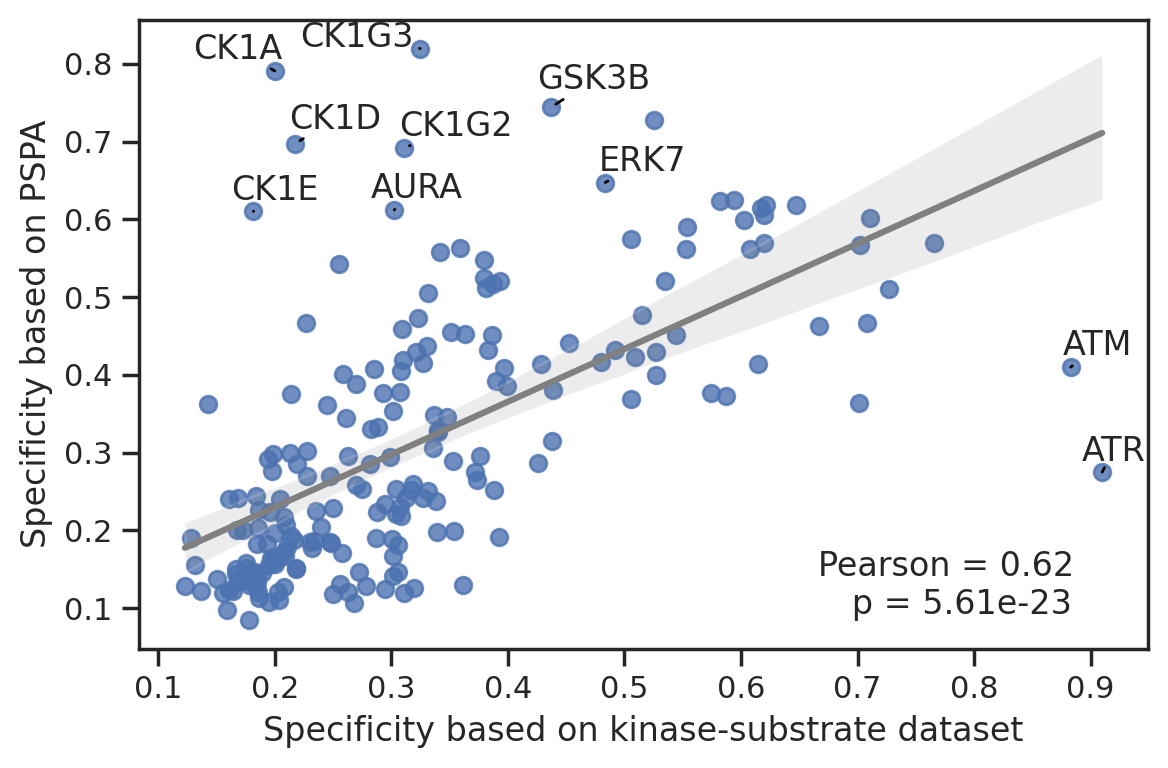

In [ ]:
plot_corr(x=overlap.ks_max, y = overlap.PSPA_max)
plt.ylabel('Specificity based on PSPA')
plt.xlabel('Specificity based on kinase-substrate dataset')
# n = 20
texts = []
for i, row in upper_left.iterrows():
    texts.append(plt.text(row['ks_max'], row['PSPA_max'], row['kinase'], ha='center', va='bottom'))
    
for i, row in lower_right.iterrows():
    texts.append(plt.text(row['ks_max'], row['PSPA_max'], row['kinase'], ha='center', va='bottom'))
    
# Use adjustText to adjust text positions
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

plt.tight_layout()

## Phospho-priming based on PSPA raw

***phospho selection score: it is calculated by getting the max in st or y, then deducted by its S/T/Y position***

In [ ]:
raw = pd.read_parquet('raw/normalized_raw_stack.parquet')

In [ ]:
t_col = raw.columns[raw.columns.str.contains('t')]

y_col = raw.columns[raw.columns.str.contains('y')]

ty_col = t_col.append(y_col)

In [ ]:
sort_pspa_ty = raw[ty_col].max(1).sort_values(ascending=False)

sort_pspa_ty = pd.DataFrame(sort_pspa_ty,columns=['value']).reset_index()

In [ ]:
sort_pspa_ty = sort_pspa_ty.merge(info)

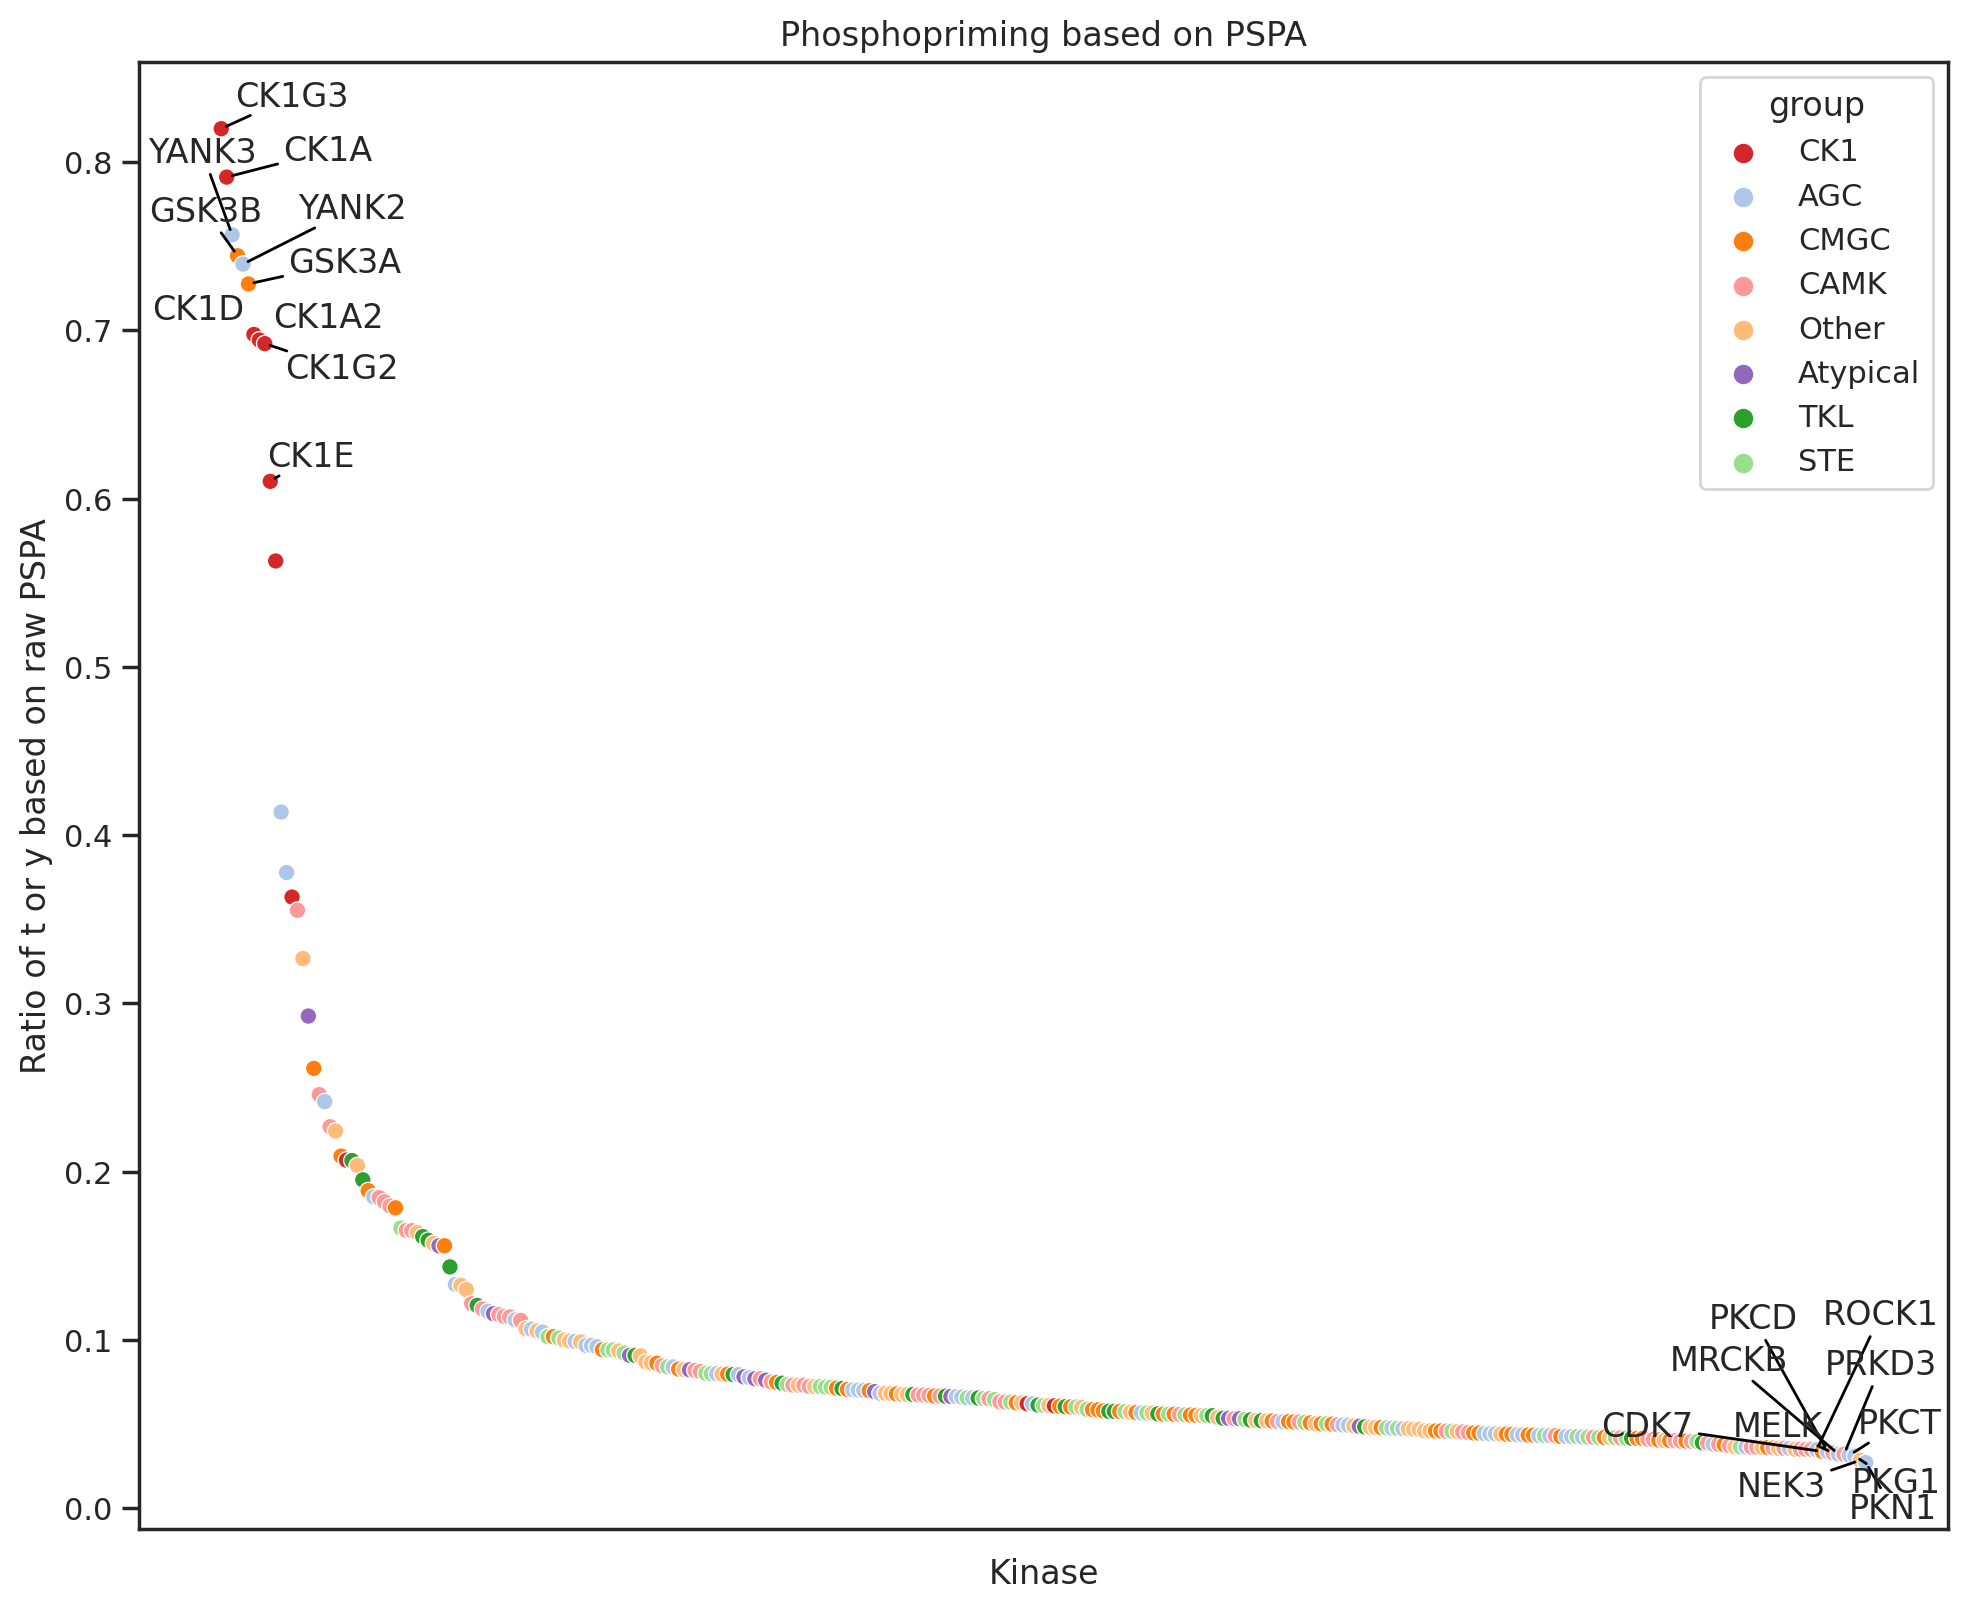

In [ ]:
plot_rank(sort_pspa_ty,x='kinase',y='value',hue='group',palette=kinase_color)
plt.ylabel('Ratio of t or y based on raw PSPA')
plt.xlabel('Kinase')
plt.title('Phosphopriming based on PSPA');

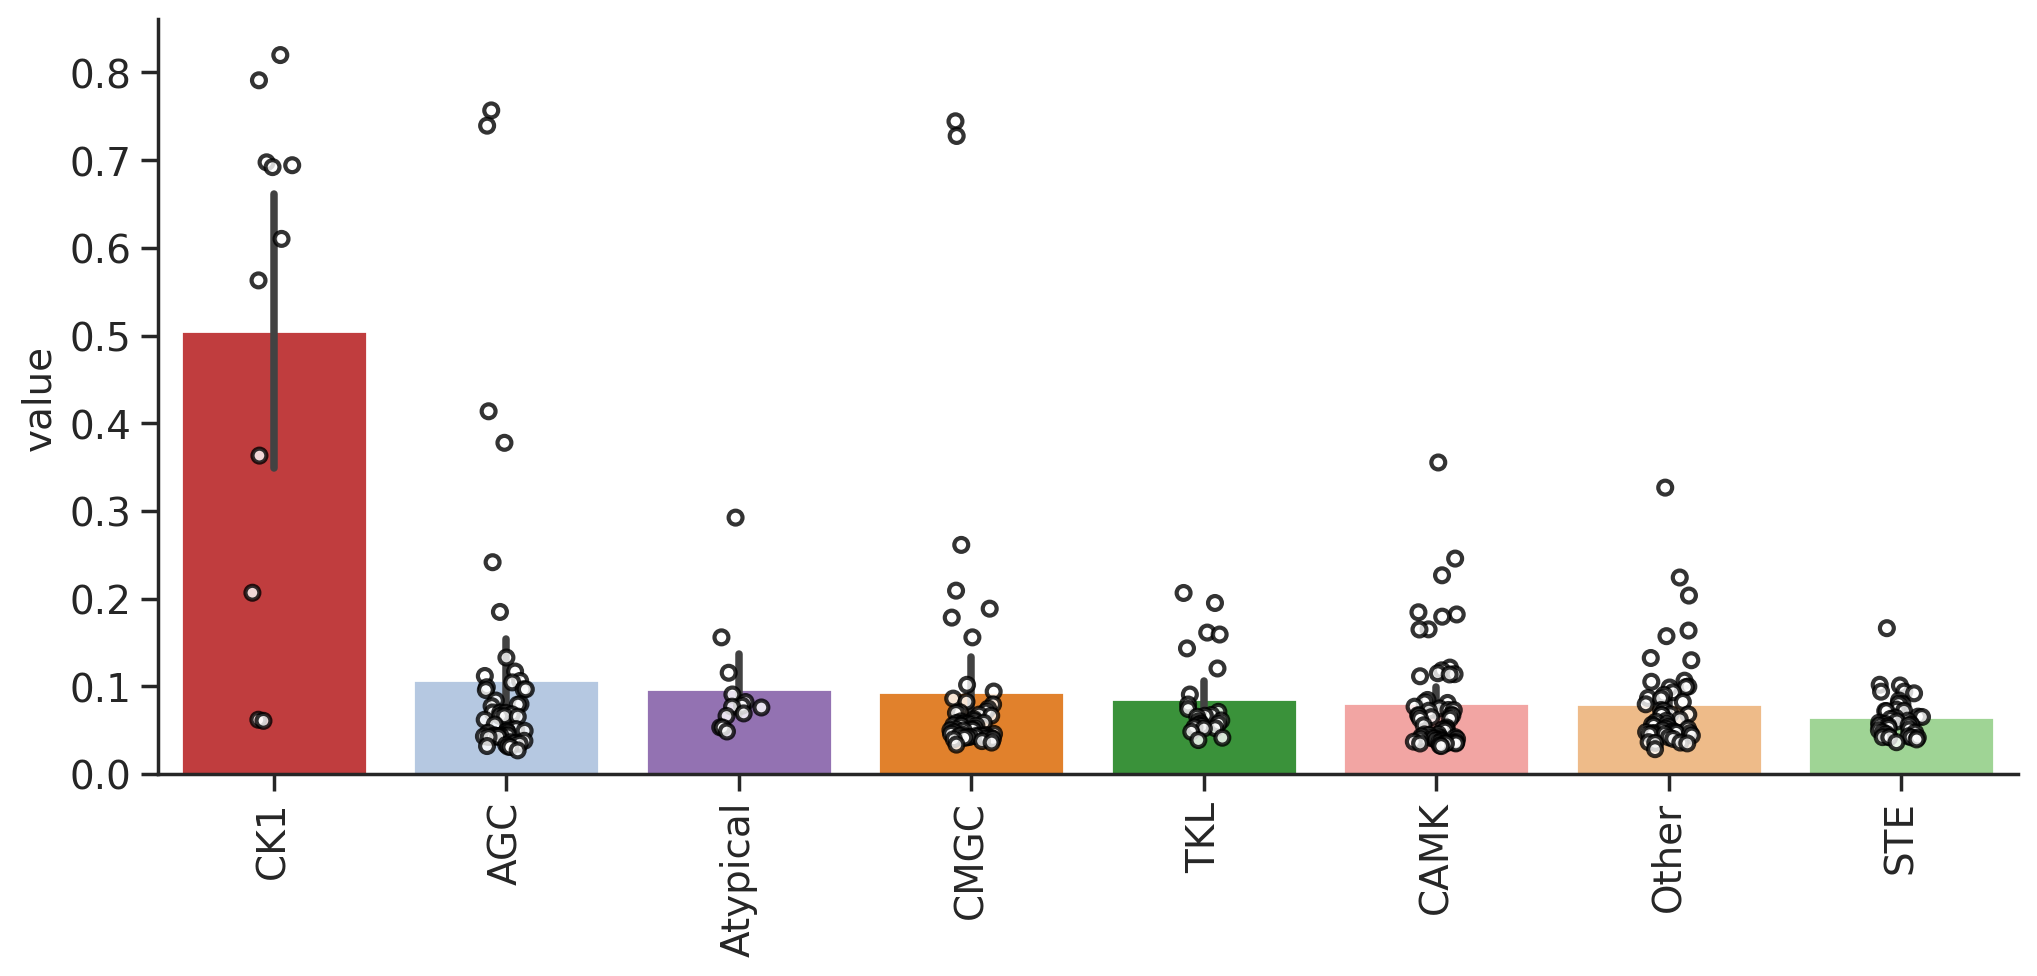

In [ ]:
plot_bar(sort_pspa_ty,'value','group',palette=kinase_color)

## T ratio rank based on PSPA

In [ ]:
T_ratio = raw[raw.columns[raw.columns.str.contains('T')]].median(1).reset_index(name='T_ratio')

sort_T = T_ratio.sort_values('T_ratio',ascending=False)

sort_T=sort_T.merge(info)

In [ ]:
sort_T.head()

,kinase,T_ratio,ID_coral,uniprot,ID_HGNC,group,family,subfamily_coral,subfamily,in_ST_paper,in_Tyr_paper,in_cddm,pseudo,pspa_category_small,pspa_category_big,cddm_big,cddm_small,length,human_uniprot_sequence,kinasecom_domain,nucleus,cytosol,cytoskeleton,plasma membrane,mitochondrion,Golgi apparatus,endoplasmic reticulum,vesicle,centrosome,aggresome,main_location
0,MYO3A,0.127174,MYO3A,Q8NEV4,MYO3A,STE,STE20,NinaC,NinaC,1,0,0,0,MAP4K,MAP4K,NaN,NaN,308,MFPLIGKTIIFDNFPDPSDTWEITETIGKGTYGKVFKVLNKKNGQKAAVKILDPIHDIDEEIEAEYNILKALSDHPNVVRFYGIYFKKDKVNGDKLWLVLELCSGGSVTDLVKGFLKRGERMSEPLIAYILHEALMGLQHLHNNKTIHRDVKGNNILLTTEGGVKLVDFGVSAQLTSTRHRRNTSVGTPFWMAPEVIACEQQLDTTYDARCDTWSLGITAIELGDGDPPLADLHPMRALFKIPRNPPPKLRQPELWSAEFNDFISKCLTKDYEKRPTVSELLQHKFITQIEGKDVMLQKQLTEFIGIHQCMGGTEKARRERIHTKKGNFNRPLISNLKDVDDLATLEILDENTVSEQLEKCYSRDQIYVYVGDILIALNPFQSLGLYSTKHSKLYIGSKRTASPPHIFAMADLGYQSMITYNSDQCIVISGESGAGKTENAHLLVQQLTVLGKANNRTLQEKILQVNNLVEAFGNACTIINDNSSRFGKYLEMKFTSSGAVVGAQISEYLLEKSRVIHQAIGEKNFHIFYYIYAGLAEKKKLAHYKLPENKPPRYLQNDHLRTVQDIMNNSFYKSQYELIEQCFKVIGFTMEQLGS...,WEITETIGKGTYGKVFKVLNKKNGQKAAVKILDPIHDIDEEIEAEYNILKALSDHPNVVRFYGIYFKKDKVNGDKLWLVLELCSGGSVTDLVKGFLKRGERMSEPLIAYILHEALMGLQHLHNNKTIHRDVKGNNILLTTEGGVKLVDFGVSAQLTSTRHRRNTSVGTPFWMAPEVIACEQQLDTTYDARCDTWSLGITAIELGDGDPPLADLHPMRALFKIPRNPPPKLRQPELWSAEFNDFISKCLTKDYEKRPTVSELLQHKFI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,MST2,0.125646,MST2,Q13188,STK3,STE,STE20,MST,MST,1,0,1,0,MAP3K,MAP3K,2.0,6.0,491,MEQPPAPKSKLKKLSEDSLTKQPEEVFDVLEKLGEGSYGSVFKAIHKESGQVVAIKQVPVESDLQEIIKEISIMQQCDSPYVVKYYGSYFKNTDLWIVMEYCGAGSVSDIIRLRNKTLIEDEIATILKSTLKGLEYLHFMRKIHRDIKAGNILLNTEGHAKLADFGVAGQLTDTMAKRNTVIGTPFWMAPEVIQEIGYNCVADIWSLGITSIEMAEGKPPYADIHPMRAIFMIPTNPPPTFRKPELWSDDFTDFVKKCLVKNPEQRATATQLLQHPFIKNAKPVSILRDLITEAMEIKAKRHEEQQRELEEEEENSDEDELDSHTMVKTSVESVGTMRATSTMSEGAQTMIEHNSTMLESDLGTMVINSEDEEEEDGTMKRNATSPQVQRPSFMDYFDKQDFKNKSHENCNQNMHEPFPMSKNVFPDNWKVPQDGDFDFLKNLSLEELQMRLKALDPMMEREIEELRQRYTAKRQPILDAMDAKKRRQQNF,FDVLEKLGEGSYGSVFKAIHKESGQVVAIKQVPVESDLQEIIKEISIMQQCDSPYVVKYYGSYFKNTDLWIVMEYCGAGSVSDIIRLRNKTLIEDEIATILKSTLKGLEYLHFMRKIHRDIKAGNILLNTEGHAKLADFGVAGQLTDTMAKRNTVIGTPFWMAPEVIQEIGYNCVADIWSLGITSIEMAEGKPPYADIHPMRAIFMIPTNPPPTFRKPELWSDDFTDFVKKCLVKNPEQRATATQLLQHPFI,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cytosol
2,MEKK6,0.121383,MAP3K6,O95382,MAP3K6,STE,STE11,None,STE11,1,0,0,0,NEK/ASK,NEK/ASK,NaN,NaN,331,MAGPCPRSGAERAGSCWQDPLAVALSRGRQLAAPPGRGCARSRPLSVVYVLTREPQPGLEPREGTEAEPLPLRCLREACAQVPRPRPPPQLRSLPFGTLELGDTAALDAFYNADVVVLEVSSSLVQPSLFYHLGVRESFSMTNNVLLCSQADLPDLQALREDVFQKNSDCVGSYTLIPYVVTATGRVLCGDAGLLRGLADGLVQAGVGTEALLTPLVGRLARLLEATPTDSCGYFRETIRRDIRQARERFSGPQLRQELARLQRRLDSVELLSPDIIMNLLLSYRDVQDYSAIIELVETLQALPTCDVAEQHNVCFHYTFALNRRNRPGDRAKALSVLLPLVQLEGSVAPDLYCMCGRIYKDMFFSSGFQDAGHREQAYHWYRKAFDVEPSLHSGINAAVLLIAAGQHFEDSKELRLIGMKLGCLLARKGCVEKMQYYWDVGFYLGAQILANDPTQVVLAAEQLYKLNAPIWYLVSVMETFLLYQHFRPTPEPPGGPPRRAHFWLHFLLQSCQPFKTACAQGDQCLVLVLEMNKVLLPAKLEVRGTDPVSTVTLSLLEPETQDIPSSWTFPVASICGVSASKRDERCCFLYALPPA...,YTETGERLVLGKGTYGVVYAGRDRHTRVRIAIKEIPERDSRFSQPLHEEIALHRRLRHKNIVRYLGSASQGGYLKIFMEEVPGGSLSSLLRSVWGPLKDNESTISFYTRQILQGLGYLHDNHIVHRDIKGDNVLINTFSGLLKISDFGTSKRLAGITPCTETFTGTLQYMAPEIIDQGPRGYGKAADIWSLGCTVIEMATGRPPFHELGSPQAAMFQVGMYKVHPPMPSSLSAEAQAFLLRTFEPDPRLRASAQTLLGDPFL,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,aggresome
3,MAP3K15,0.121168,MAP3K15,Q6ZN16,MAP3K15,STE,STE11,None,STE11,1,0,0,0,NEK/ASK,NEK/ASK,NaN,NaN,292,MESGGGNAPAGALGAASESPQCPPPPGVEGAAGPAEPDGAAEGAAGGSGEGESGGGPRRALRAVYVRSESSQGGAAGGPEAGARQCLLRACEAEGAHLTSVPFGELDFGETAVLDAFYDADVAVVDMSDVSRQPSLFYHLGVRESFDMANNVILYHDTDADTALSLKDMVTQKNTASSGNYYFIPYIVTPCADYFCCESDAQRRASEYMQPNWDNILGPLCMPLVDRFISLLKDIHVTSCVYYKETLLNDIRKAREKYQGEELAKELARIKLRMDNTEVLTSDIIINLLLSYRDIQDYDAMVKLVETLEMLPTCDLADQHNIKFHYAFALNRRNSTGDREKALQIMLQVLQSCDHPGPDMFCLCGRIYKDIFLDSDCKDDTSRDSAIEWYRKGFELQSSLYSGINLAVLLIVAGQQFETSLELRKIGVRLNSLLGRKGSLEKMNNYWDVGQFFSVSMLAHDVGKAVQAAERLFKLKPPVWYLRSLVQNLLLIRRFKKTIIEHSPRQERLNFWLDIIFEATNEVTNGLRFPVLVIEPTKVYQPSYVSINNEAEERTVSLWHVSPTEMKQMHEWNFTASSIKGISLSKFDERCCFLYV...,HDANGERVVLGKGTYGIVYAGRDLSNQVRIAIKEIPERDSRQVQAGLP

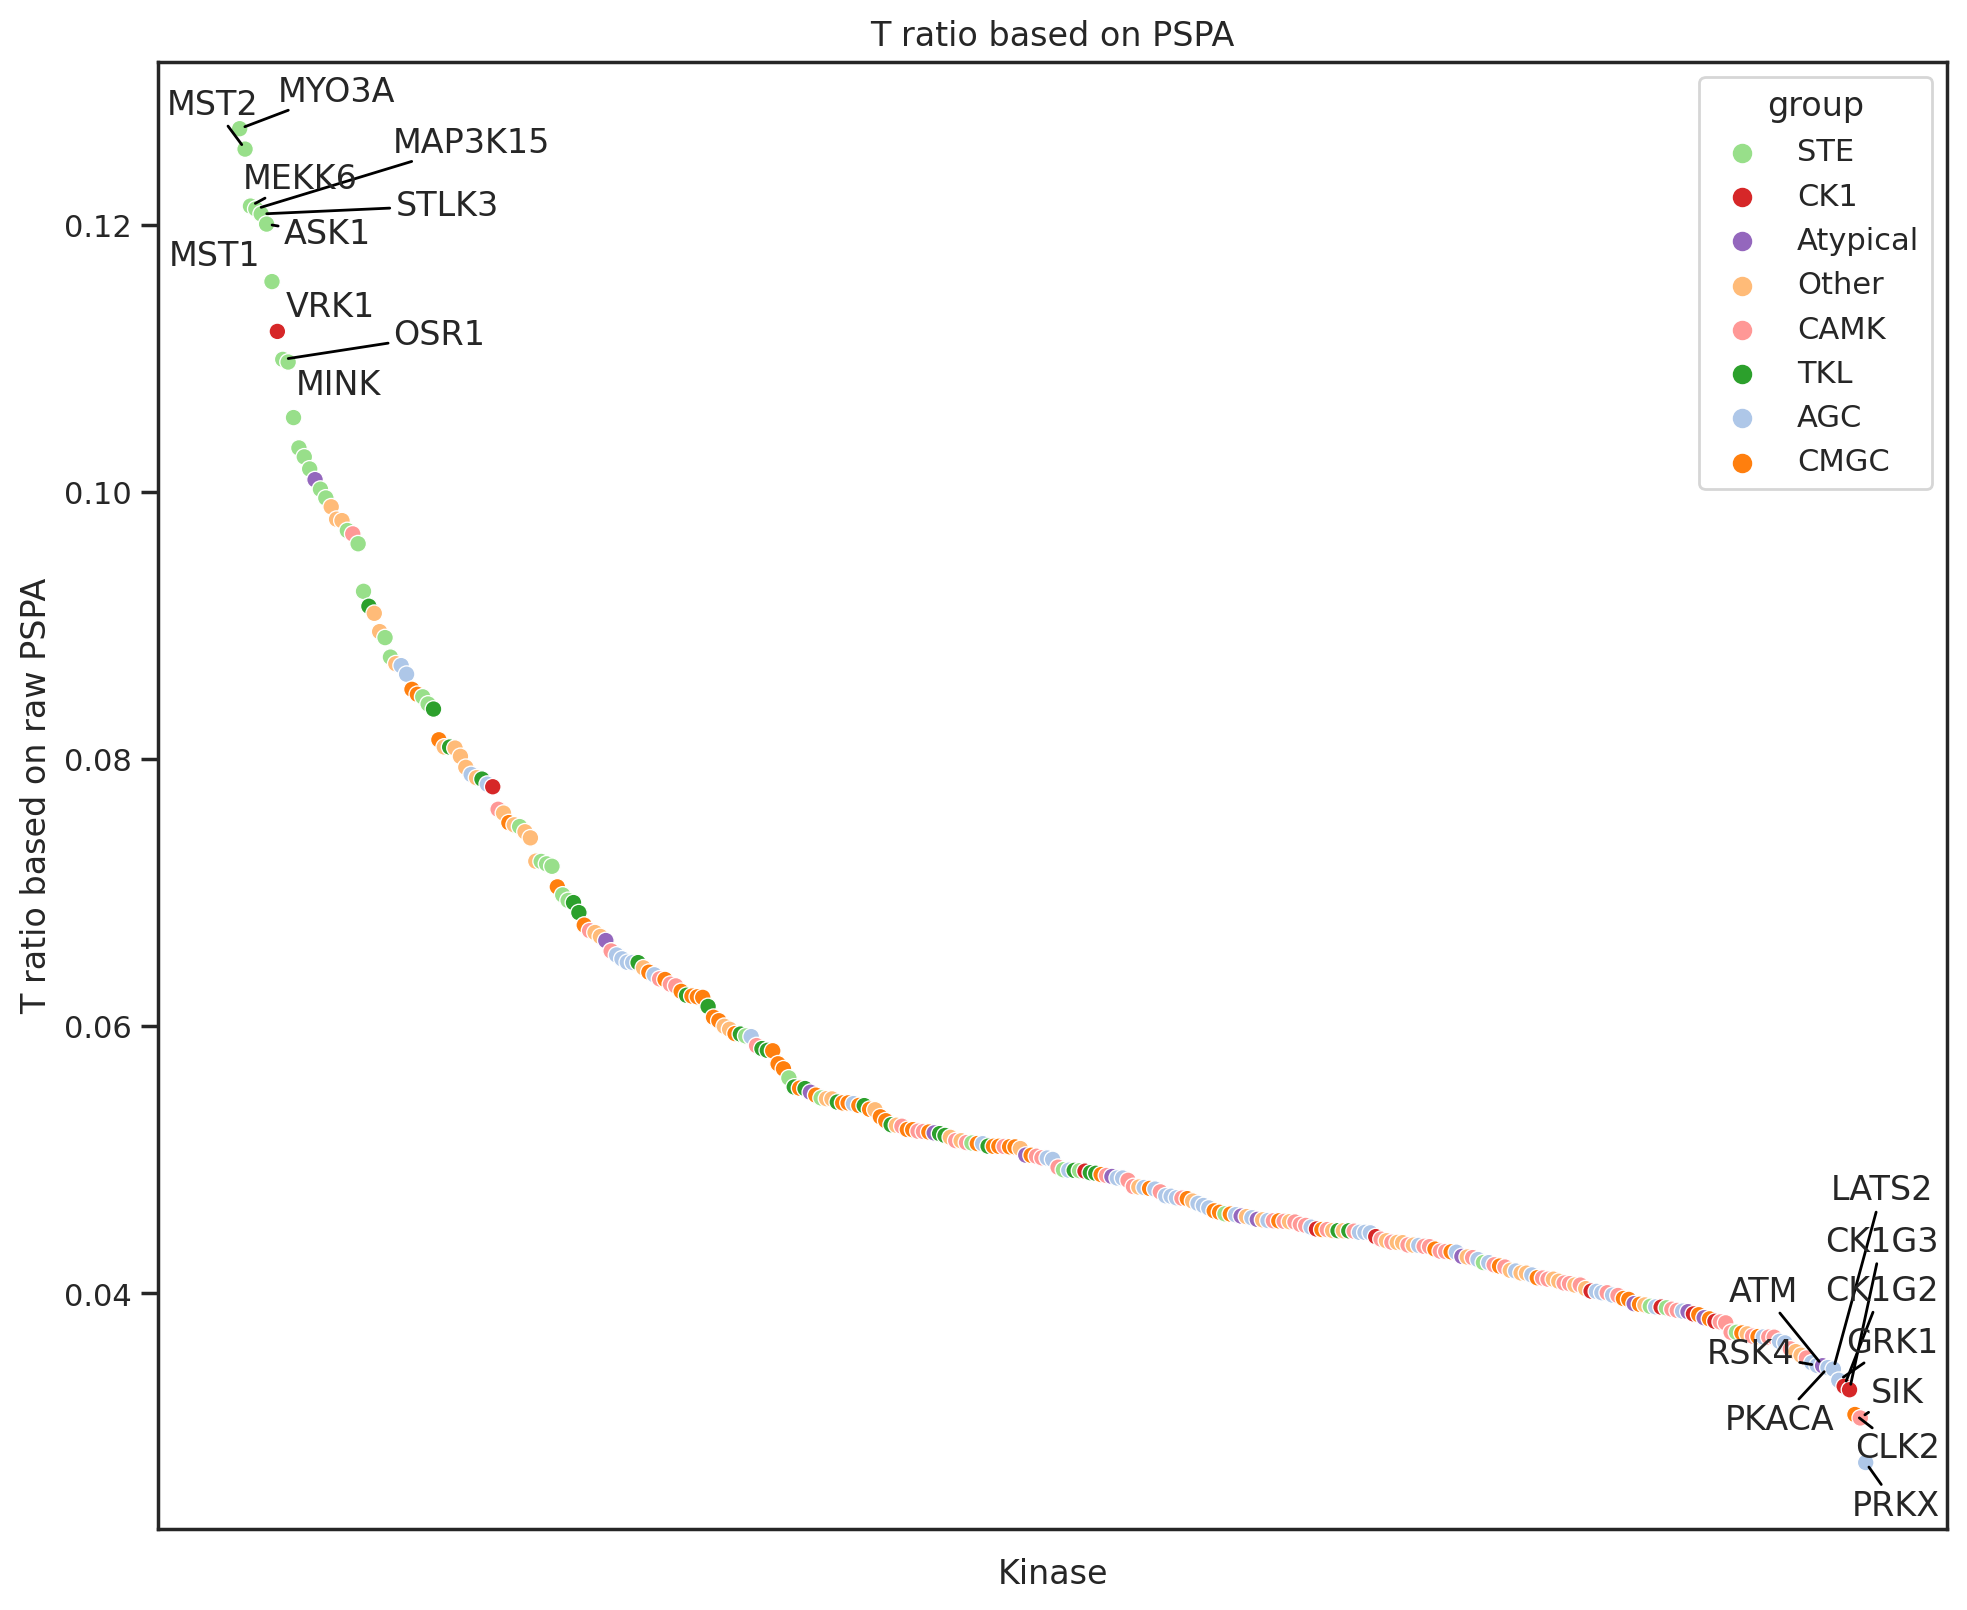

In [ ]:
plot_rank(sort_T,x='kinase',y='T_ratio',hue='group',palette=kinase_color)
plt.ylabel('T ratio based on raw PSPA')
plt.xlabel('Kinase')
plt.title('T ratio based on PSPA');

## S ratio based on PSPA data

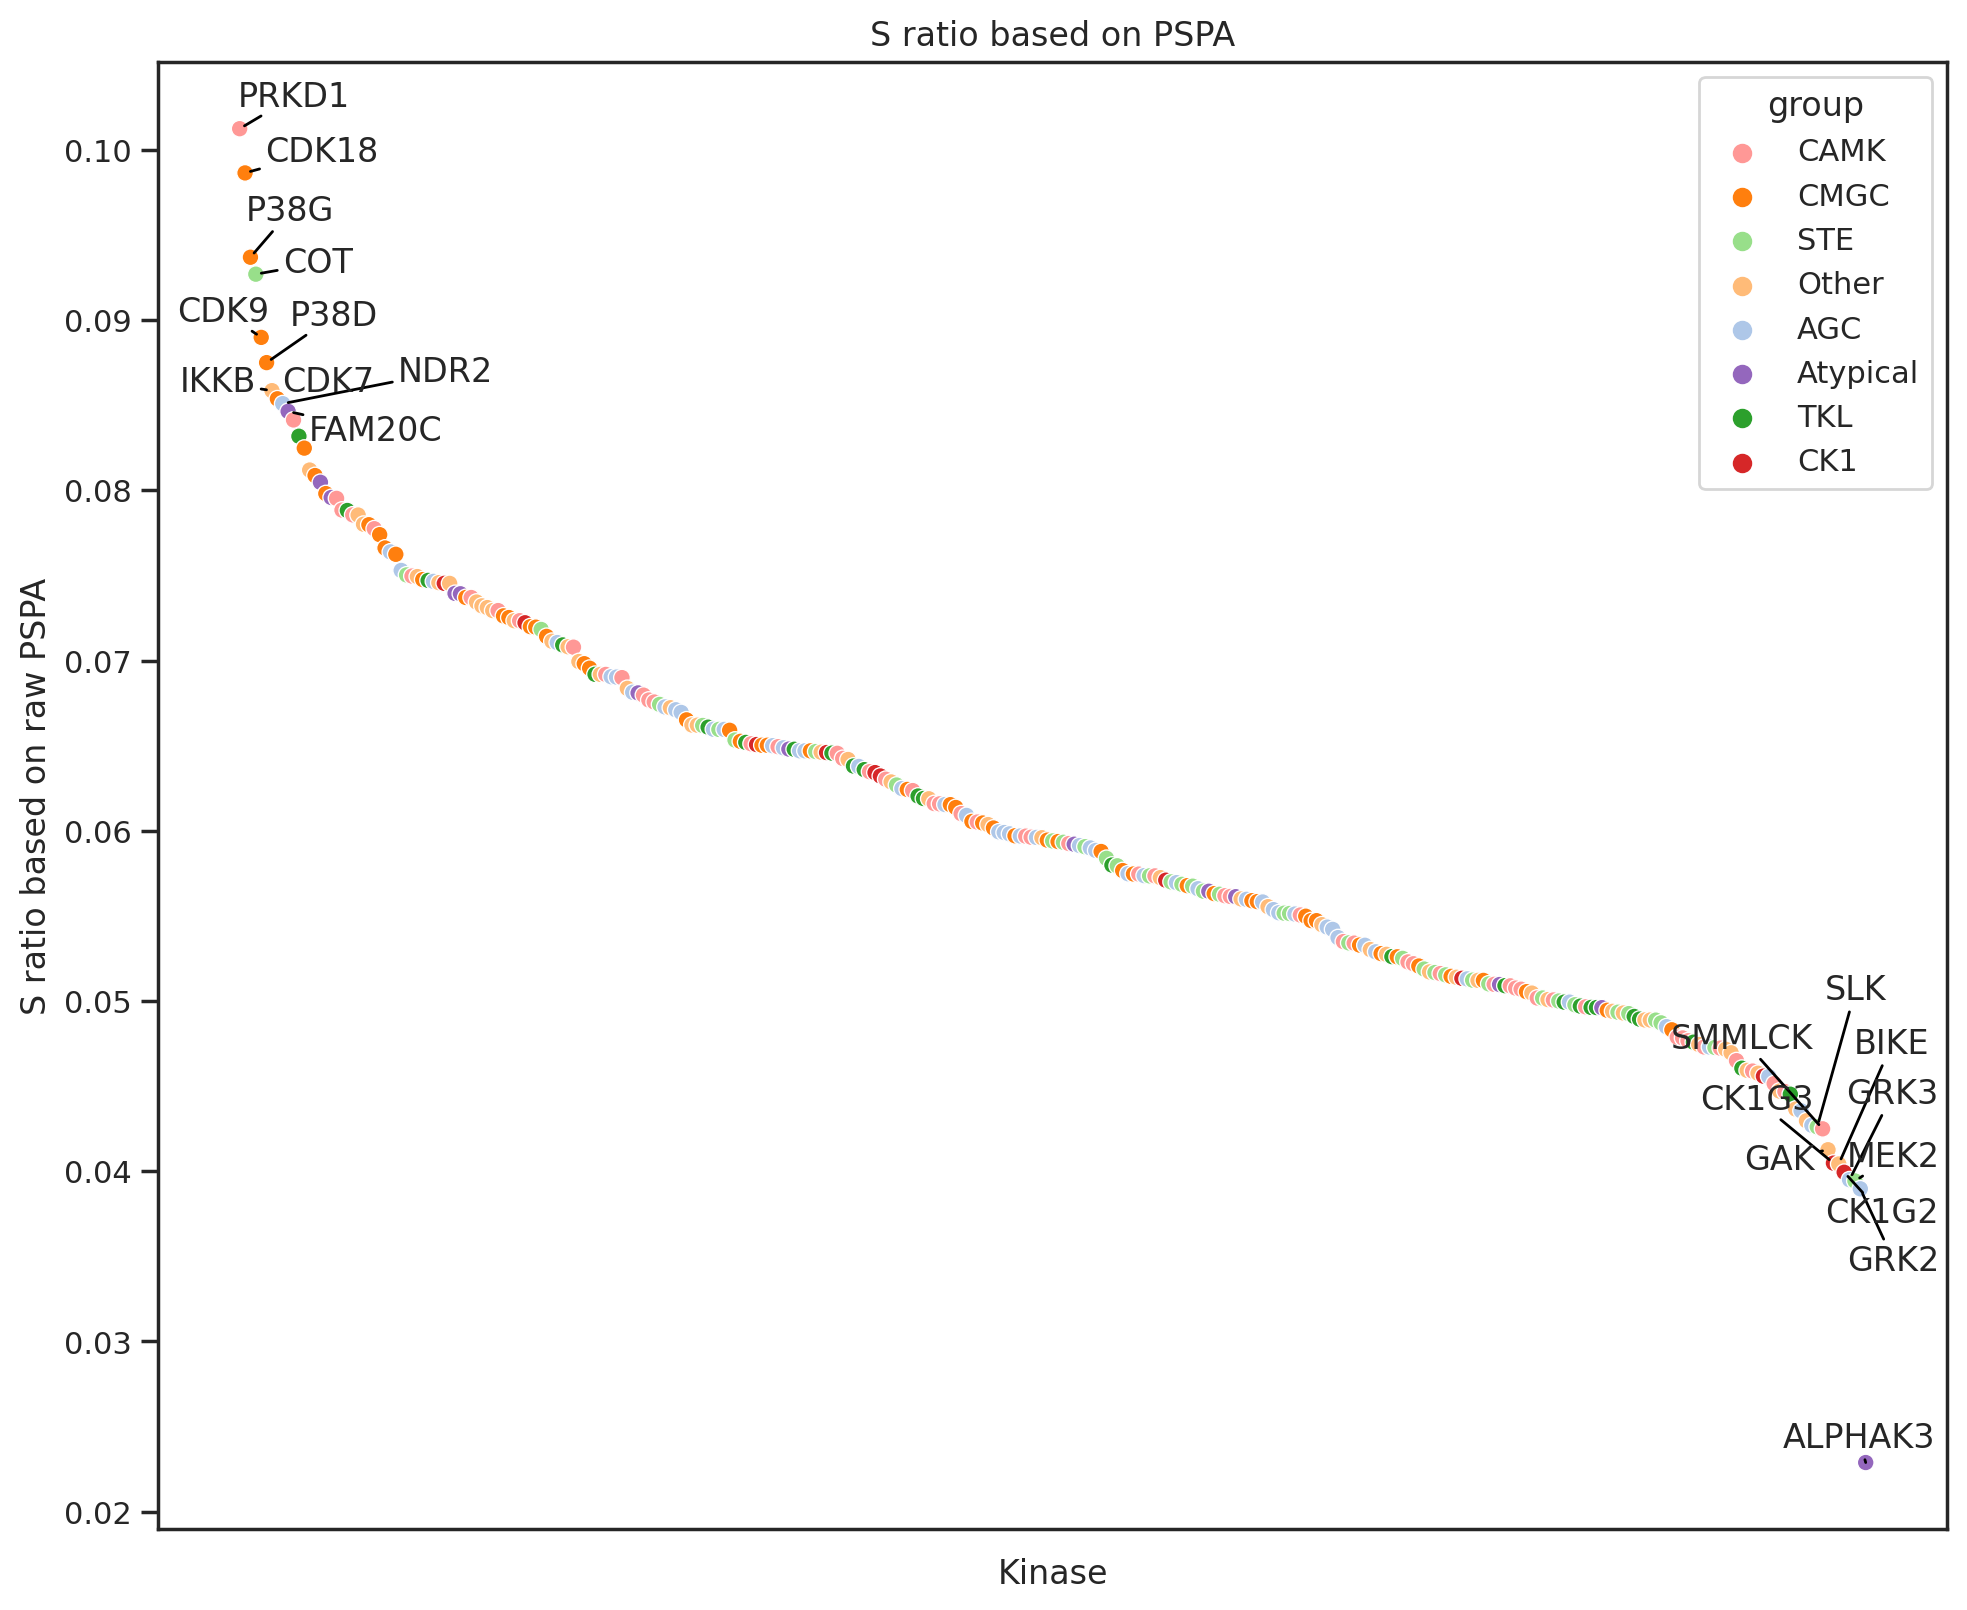

In [ ]:
S_ratio = raw[raw.columns[raw.columns.str.contains('S')]].median(1).reset_index(name='S_ratio')

sort_S = S_ratio.sort_values('S_ratio',ascending=False)

sort_S=sort_S.merge(info)

plot_rank(sort_S,x='kinase',y='S_ratio',hue='group',palette=kinase_color)
plt.ylabel('S ratio based on raw PSPA')
plt.xlabel('Kinase')
plt.title('S ratio based on PSPA');

## Y ratio based on PSPA data

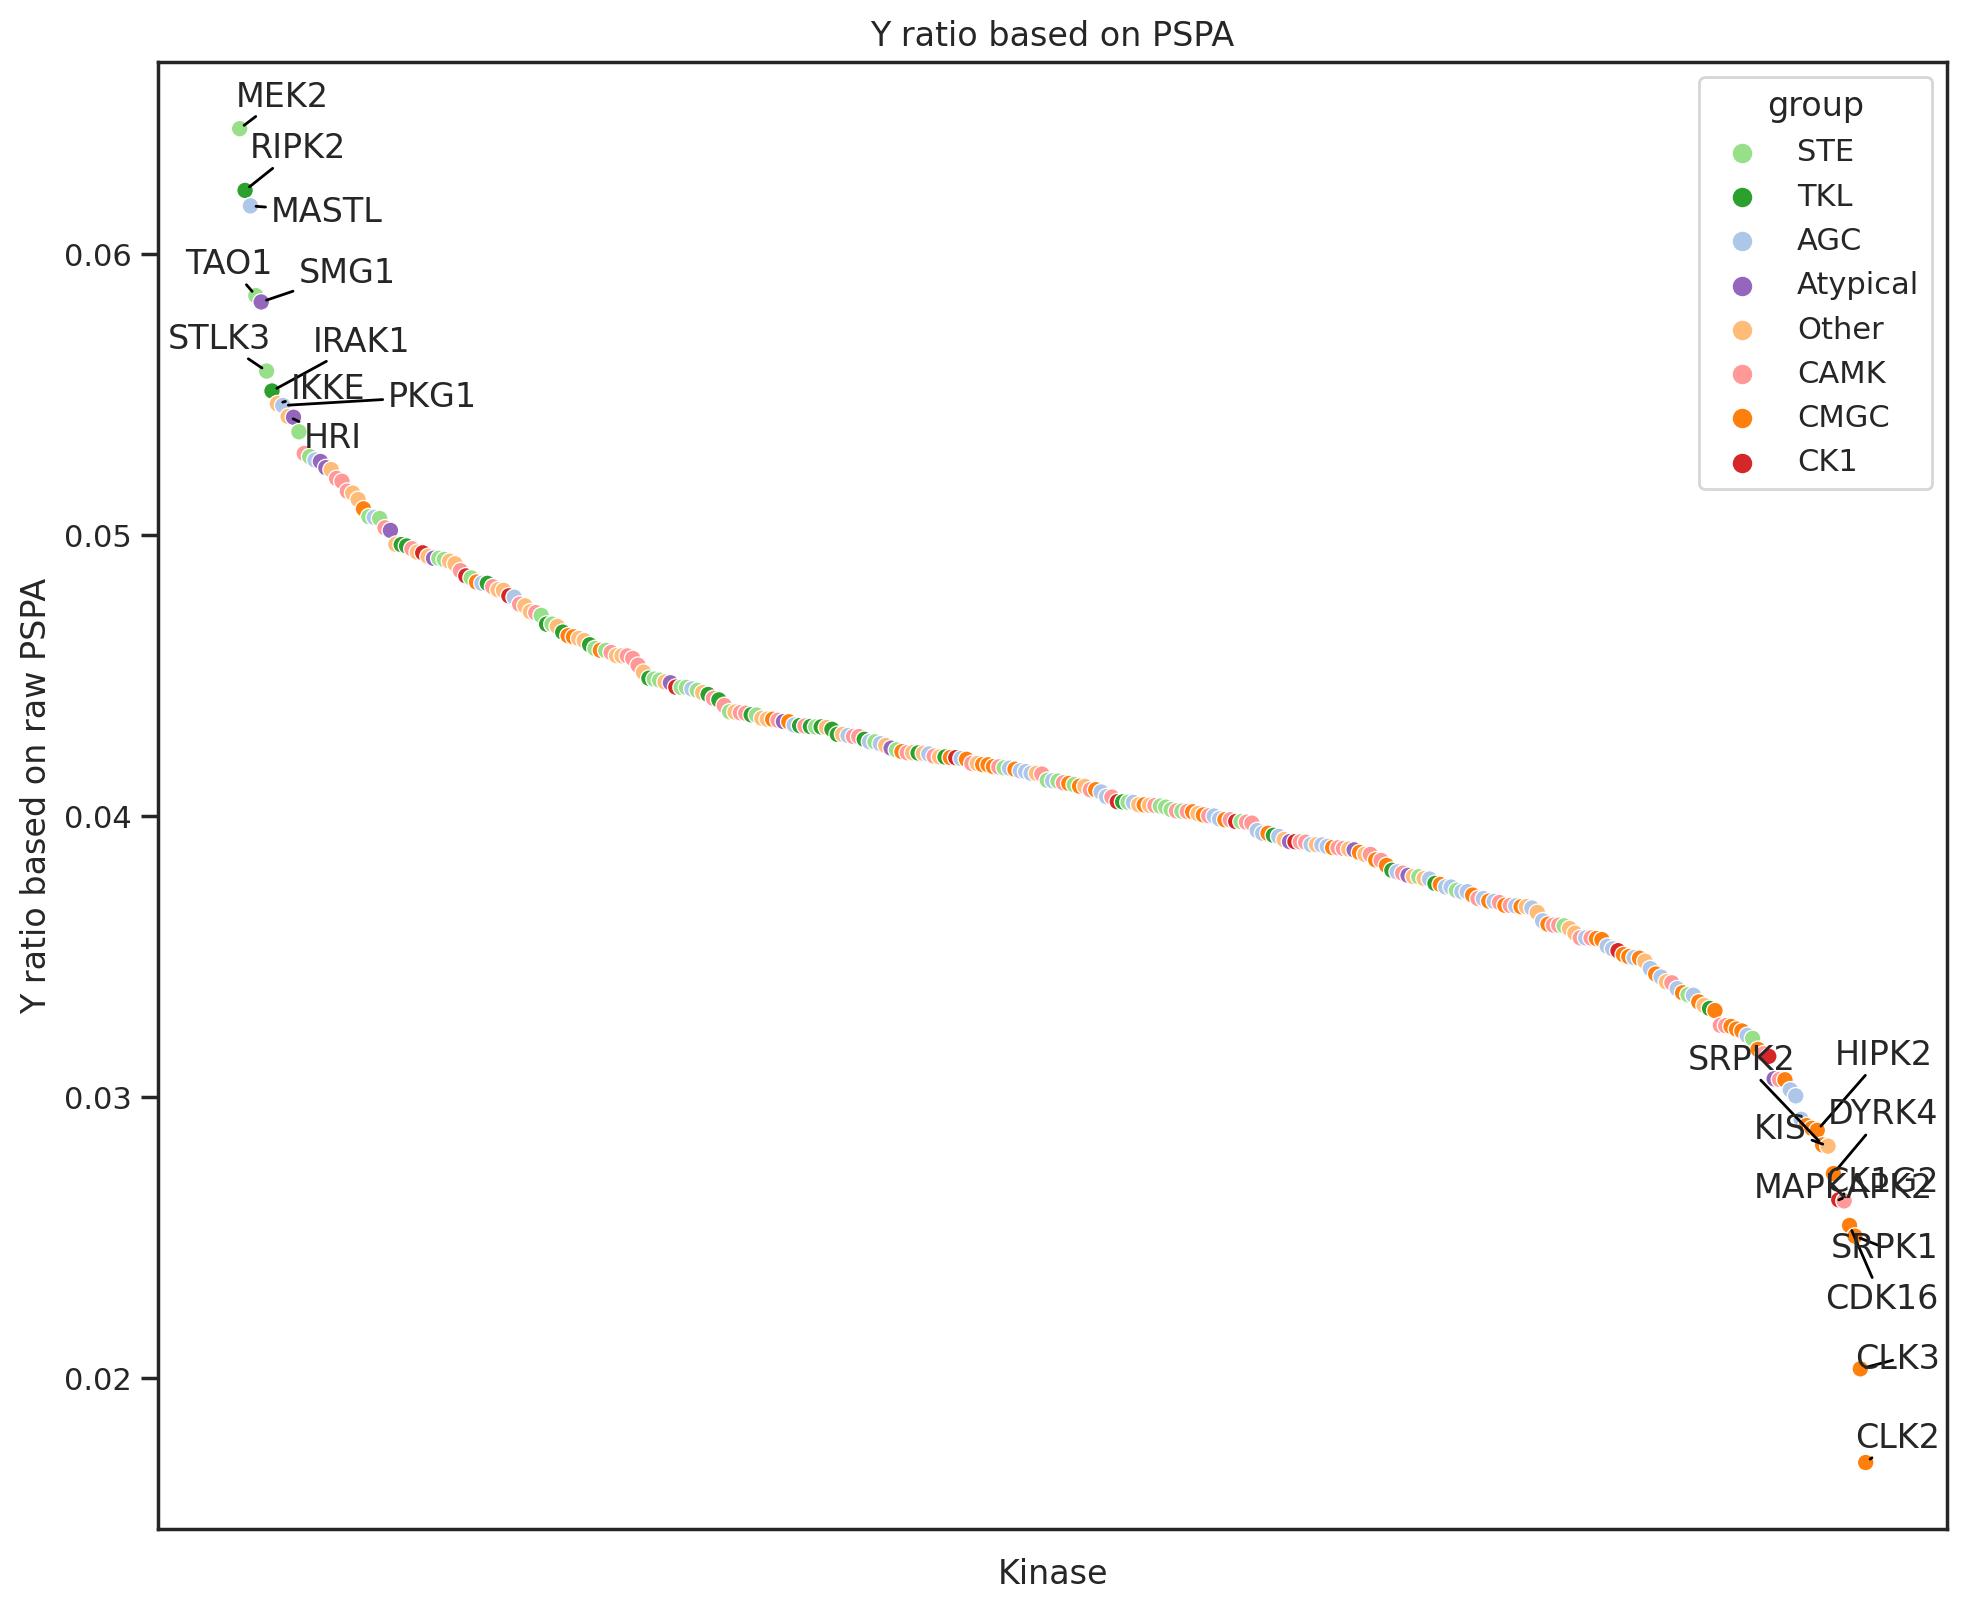

In [ ]:
Y_ratio = raw[raw.columns[raw.columns.str.contains('Y')]].median(1).reset_index(name='Y_ratio')

sort_Y = Y_ratio.sort_values('Y_ratio',ascending=False)

sort_Y=sort_Y.merge(info)

plot_rank(sort_Y,x='kinase',y='Y_ratio',hue='group',palette=kinase_color)
plt.ylabel('Y ratio based on raw PSPA')
plt.xlabel('Kinase')
plt.title('Y ratio based on PSPA');